In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
np.random.seed(42)

n = 120  # number of enterprises

counties = ["Uasin Gishu", "Nandi", "Elgeyo Marakwet", "Nakuru", "Laikipia", "Narok"]

df = pd.DataFrame({
    "county": np.random.choice(counties, n),
    "hectares": np.random.uniform(0.5, 5, n),
    "cost_inputs": np.random.uniform(15000, 60000, n),
    "labour_cost": np.random.uniform(8000, 30000, n),
    "yield_tonnes": np.random.uniform(2, 12, n),
    "price_per_tonne": np.random.uniform(7000, 12000, n),
    "equipment_rental": np.random.uniform(5000, 20000, n),
    "transport_cost": np.random.uniform(3000, 15000, n),
})

df["total_sales"] = df["yield_tonnes"] * df["price_per_tonne"]
df["gross_profit"] = df["total_sales"] - (
    df["cost_inputs"] + df["labour_cost"] + df["equipment_rental"] + df["transport_cost"]
)

df.head()

,county,hectares,cost_inputs,labour_cost,yield_tonnes,price_per_tonne,equipment_rental,transport_cost,total_sales,gross_profit
0,Nakuru,1.989041,22273.292134,22524.342288,5.742708,7681.857378,7563.313811,9915.460322,44114.663493,-18161.745062
1,Laikipia,0.786013,55434.938484,14158.545733,5.706421,7072.723328,15029.648299,10280.580557,40359.940257,-54543.772815
2,Elgeyo Marakwet,1.899420,42289.307685,29007.036175,10.127996,8752.937794,18940.639837,8089.568056,88649.716100,-9676.835652
3,Laikipia,1.963325,15413.867323,24233.732167,11.472486,9949.588434,13351.443395,11837.330827,114146.511768,49310.138055
4,Laikipia,3.783228,19566.219429,20195.789155,11.860011,8961.220225,13574.190342,14212.404177,106280.167206,38731.564102



Summary Statistics:

         hectares   cost_inputs   labour_cost  yield_tonnes  price_per_tonne  \
count  120.000000    120.000000    120.000000    120.000000       120.000000   
mean     2.703868  38134.654725  18827.725398      7.586261      9157.934398   
std      1.298886  13126.180486   6663.750522      3.051895      1390.410162   
min      0.531285  15227.771273   8238.428333      2.113536      7072.723328   
25%      1.589020  27124.115117  12206.471215      5.423961      7919.303928   
50%      2.749837  39556.014542  18973.122196      7.835124      8923.820521   
75%      3.812416  48398.969157  24564.165543     10.392763     10146.377528   
max      4.935427  59552.423255  29791.113124     11.997177     11932.576244   

       equipment_rental  transport_cost    total_sales  gross_profit  
count        120.000000      120.000000     120.000000    120.000000  
mean       12664.890656     8520.667493   69793.569289  -8354.368984  
std         4159.519567     3443.580874   30

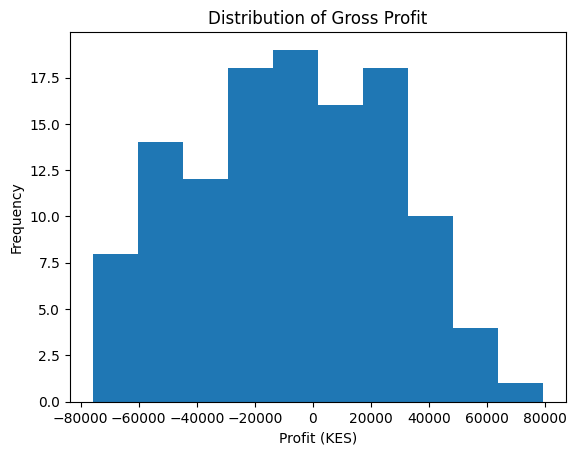

In [4]:
print("\nSummary Statistics:\n")
print(df.describe())

plt.hist(df["gross_profit"])
plt.title("Distribution of Gross Profit")
plt.xlabel("Profit (KES)")
plt.ylabel("Frequency")
plt.show()

In [5]:
features = ["hectares", "cost_inputs", "labour_cost", "yield_tonnes",
            "price_per_tonne", "equipment_rental", "transport_cost"]

X = df[features]
y = df["gross_profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 3390.5019348346605
R²: 0.9934801554588305


In [6]:
importance = pd.DataFrame({
    "feature": features,
    "coefficient": model.coef_
}).sort_values("coefficient", ascending=False)

print("\nFeature Importance:\n")
print(importance)


Feature Importance:

            feature  coefficient
3      yield_tonnes  9011.500591
0          hectares   442.138166
4   price_per_tonne     7.214717
2       labour_cost    -0.932610
6    transport_cost    -0.965289
1       cost_inputs    -0.991727
5  equipment_rental    -1.065153


In [7]:
df["viability_score"] = pd.qcut(df["gross_profit"], 5, labels=[1,2,3,4,5])
df[["county", "gross_profit", "viability_score"]].head()

,county,gross_profit,viability_score
0,Nakuru,-18161.745062,2
1,Laikipia,-54543.772815,1
2,Elgeyo Marakwet,-9676.835652,3
3,Laikipia,49310.138055,5
4,Laikipia,38731.564102,5


In [8]:
df.to_csv("fodder_enterprise_results.csv", index=False)
importance.to_csv("feature_importance.csv", index=False)